<a href="https://colab.research.google.com/github/supergoa/Cap4630Repository/blob/master/HW_3/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras import Sequential, optimizers
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)

In [0]:
m = 5000
training_size = .8

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.empty(shape=(m, 2))
  labels = np.empty(shape=(m, 1))

  # generate random data
  for i in range(1, m):
    c = np.random.randint(0,2)
    x_1 = np.random.random()
    x_2 = w * x_1 + b + (-1)**c * np.random.normal(mu, sigma)

    data[i][0] = x_1
    data[i][1] = x_2
    labels[i] = c
  return data, labels

def display_random_data(data, labels, m):
  for i in range(0, m):
    if labels[i]:
      plt.plot(data[i][0], data[i][1], 'r.')
    else:
      plt.plot(data[i][0], data[i][1], 'b.')

[0.08369118 3.93361504]
3.933615038753948


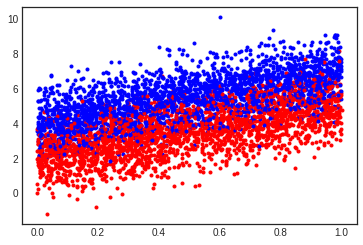

In [75]:
data, labels = get_random_data(3, 3, 1, 1, m)
display_random_data(data, labels, m)

#split into train/test
train_data = data[0:int(m*training_size)]
train_label = labels[0:int(m*training_size)]
test_data = data[int(m*training_size):]
test_label = labels[int(m*training_size):]

print(train_data[2])
print(train_data[2][1])

Problem 2

In [76]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(train_data, train_label, epochs=200, batch_size=20, validation_data=(test_data, test_label))

Epoch 1/200
200/200 [==============================] - 0s 2ms/step - loss: 0.9342 - accuracy: 0.4317 - val_loss: 0.7259 - val_accuracy: 0.4720
Epoch 2/200
200/200 [==============================] - 0s 1ms/step - loss: 0.7266 - accuracy: 0.4888 - val_loss: 0.7013 - val_accuracy: 0.5040
Epoch 3/200
200/200 [==============================] - 0s 1ms/step - loss: 0.7006 - accuracy: 0.5272 - val_loss: 0.6752 - val_accuracy: 0.5810
Epoch 4/200
200/200 [==============================] - 0s 1ms/step - loss: 0.6787 - accuracy: 0.5805 - val_loss: 0.6541 - val_accuracy: 0.6310
Epoch 5/200
200/200 [==============================] - 0s 1ms/step - loss: 0.6579 - accuracy: 0.6108 - val_loss: 0.6327 - val_accuracy: 0.6600
Epoch 6/200
200/200 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.6382 - val_loss: 0.6145 - val_accuracy: 0.6770
Epoch 7/200
200/200 [==============================] - 0s 1ms/step - loss: 0.6221 - accuracy: 0.6637 - val_loss: 0.5992 - val_accuracy: 0.7010

In [77]:
test_loss, test_acc = model.evaluate(test_data, test_label)

32/32 [==============================] - 0s 1ms/step - loss: 0.3549 - accuracy: 0.8480


In [78]:
print(model.get_weights())

[array([[ 5.0071144],
       [-1.695778 ]], dtype=float32), array([5.1516905], dtype=float32)]


The line:
*   $w_1∗x + w_2∗y + b=0 $
*   $y=−w1∗x/w2 − b/w2$

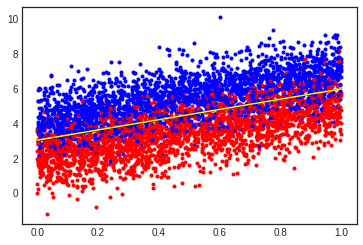

In [79]:
# Real
x_real = np.linspace(0,1,50)
y_real = x_real*3 + 3

w1 = model.get_weights()[0][0]
w2 = model.get_weights()[0][1]
b = model.get_weights()[1][0]

# Trained model
x_model = x_real
y_model = -(w1)*x_model/w2 - b/w2

display_random_data(data, labels, m)
plt.plot(x_real, y_real, "black")
plt.plot(x_model, y_model, "yellow")

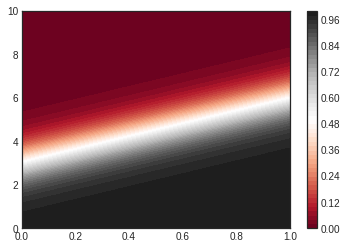

In [80]:
plt.style.use('seaborn-white')
x = np.linspace(0, 1, 50)
y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x, y)
# source: https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/
Z = model.predict(np.c_[X.ravel(), Y.ravel()])
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()
plt.show()

Problem 3

In [0]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [82]:
weights = np.random.rand(3)
weights[2] = 0
lr = 0.001
epochs = 400
for epoch in range(0, epochs):
  for sample in range(0, len(train_data)):
    a = sigmoid(np.dot(weights[0:2], train_data[sample]) + weights[2:])
    dldw1 = (a - train_label[sample]) * train_data[sample][0]
    dldw2 = (a - train_label[sample]) * train_data[sample][1]
    dldb = a - train_label[sample]
    weights[0] -= dldw1*lr
    weights[1] -= dldw2*lr
    weights[2] -= dldb*lr

print(weights[0:2].T)
print(weights[2:])

[ 5.88575884 -1.90152333]
[5.68412461]


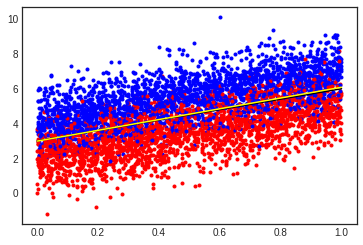

In [83]:
# Real
x_real = np.linspace(0,1,50)
y_real = x_real*3 + 3

w1 = weights[0]
w2 = weights[1]
b = weights[2]

# Trained model
x_model = x_real
y_model = -(w1)*x_model/w2 - b/w2

display_random_data(data, labels, m)
plt.plot(x_real, y_real, "black")
plt.plot(x_model, y_model, "yellow")

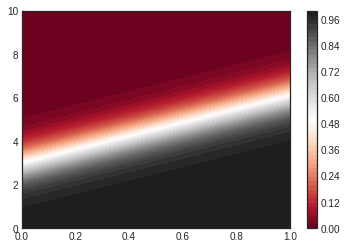

In [84]:
plt.style.use('seaborn-white')
x = np.linspace(0, 1, 50)
y = np.linspace(0, 10, 50)
X, Y = np.meshgrid(x, y)

# source: https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/
Z = sigmoid(X.ravel() * w1 + Y.ravel() * w2 + b)
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, 50, cmap='RdGy')
plt.colorbar()
plt.show()

Compute accuracy and binary cross entropy loss

In [0]:
def bcel(y, a):
  return -y * np.log10(a) - (1-y) * np.log10(1-a)

In [86]:
count = 0
loss = 0
for sample in range(0, len(test_data)):
    a = sigmoid(np.dot(weights[0:2], test_data[sample]) + weights[2:])
    if a >= .5 and test_label[sample] == 1:
      count += 1
    elif a < .5 and test_label[sample] == 0:
      count += 1
    loss += bcel(test_label[sample], a)
print(count/len(test_data))
print(loss/len(test_data))

0.846
[0.15319477]
